In [4]:
### DATA Preparation:

### DATA DICTIONARY:

***CUST_ID:*** Credit card holder ID
***BALANCE:*** Monthly average balance (based on daily balance averages)
***BALANCE_FREQUENCY:*** Ratio of last 12 months with balance
***PURCHASES:*** Total purchase amount spent during last 12 months
***ONEOFF_PURCHASES:*** Total amount of one-off purchases
***INSTALLMENTS_PURCHASES:*** Total amount of installment purchases
***CASH_ADVANCE:*** Total cash-advance amount
***PURCHASES_ FREQUENCY:*** Frequency of purchases (Percent of months with at least one purchase)
***ONEOFF_PURCHASES_FREQUENCY:*** Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
***CASH_ADVANCE_ FREQUENCY:*** Cash-Advance frequency
***AVERAGE_PURCHASE_TRX:*** Average amount per purchase transaction
***CASH_ADVANCE_TRX:*** Average amount per cash-advance transaction
***PURCHASES_TRX:*** Average amount per purchase transaction
***CREDIT_LIMIT:*** Credit limit
***PAYMENTS:*** Total payments (due amount paid by the customer to decrease their statement balance) in the period
***MINIMUM_PAYMENTS:*** Total minimum payments due in the period.
***PRC_FULL_PAYMEN:*** Percentage of months with full payment of the due statement balance
***TENURE:*** Number of months as a customer

In [1]:
### Import Library

import pandas as pd
import numpy as np
import glob as gl

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from math import sqrt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Load CSV data
credit= pd.read_csv("Credit_Cards.csv")
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
### Load data info/describe
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
credit.shape

(8950, 18)

In [5]:
# Find the total number of missing values in the dataframe
print ("\nNumber of Missing values :  ", credit.isnull().sum().values.sum())


Number of Missing values :   314


In [7]:
# printing total numbers of Unique value in the dataframe. 
print ("\nNumber of Unique values : \n",credit.nunique())


Number of Unique values : 
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [8]:
### 1. Missing Value problem 
### Solution: imputing them with median.

credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
### Missing values we need to remove with median.

# CREDIT_LIMIT  
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['CREDIT_LIMIT'].count()

# MINIMUM_PAYMENTS
credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

In [21]:
# Now again check the missing values.
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [10]:
# Remove duplicates
credit = credit.drop_duplicates()
print ("\nNumber of Unique values : \n",credit.nunique())


Number of Unique values : 
 CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


#### -- Discover --

#### 1.Monthly average purchase and cash advance amount

In [26]:
#### [AVG] Monthly purchase
credit['Monthly_AVG_purchase']=credit['PURCHASES']/credit['TENURE']
print(credit['Monthly_AVG_purchase'].head(),'\n ')
#### Total purchase amount spent during last 12
print(credit['PURCHASES'].head(),'\n ')
#### Number of months as a customer
print(credit['TENURE'].head(),'\n ')

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_AVG_purchase, dtype: float64 
 
0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64 
 
0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 


In [27]:
#### Monthly_cash_advance Amount
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

#### 2.Purchases by type (one-off, installments)

- To find what type of purchases customers are making on credit card
- ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases
- INSTALLMENTS_PURCHASES: Total amount of installment purchases

In [29]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


#### 3.Derive a categorical variable with ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [49]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'NULL'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'ONEOFF and INSTALLMENTS'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'Only ONEOFF'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'Only INSTALLMENTS'
    
credit['purchase_type']=credit.apply(purchase,axis=1)
credit['purchase_type'].value_counts()

ONEOFF and INSTALLMENTS    2774
Only INSTALLMENTS          2260
NULL                       2042
Only ONEOFF                1874
Name: purchase_type, dtype: int64

In [50]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

#### 4.Payments to minimum payments ratio etc.

In [39]:
print ('Payment is null count ',credit['PAYMENTS'].isnull().any())
credit['MINIMUM_PAYMENTS'].isnull().value_counts()


Payment is null count  False


False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [36]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [40]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
credit['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

#### 5.Limit_usage (balance to credit limit ratio ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [42]:
print ('Credit score:')
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
credit['limit_usage'].head()

Credit score:


0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

### -- Deep analyse -- 

### 1. Average payment_minpayment ratio for each purchse type.

In [43]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([10.08745106,  7.23698216, 13.2590037 ,  5.57108156])

Object `ax.barh` not found.


Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

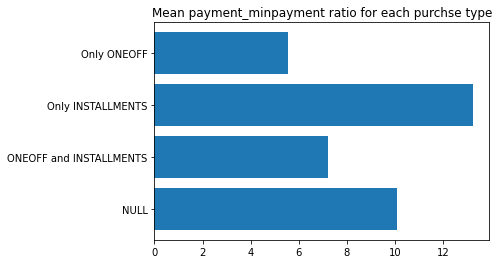

In [44]:
ax.barh?
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

### 2. Customers with installment purchases are paying dues?

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

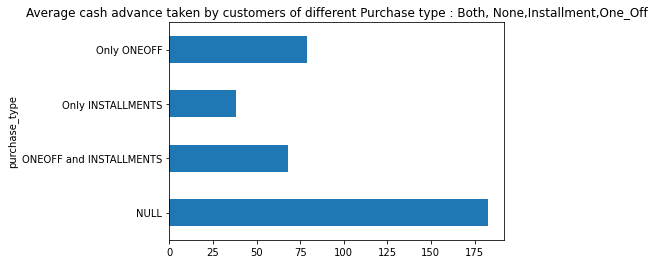

In [45]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('AVG cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

### 3.Customers who don't do either one-off or installment purchases take more cash on advance?

<AxesSubplot:ylabel='purchase_type'>

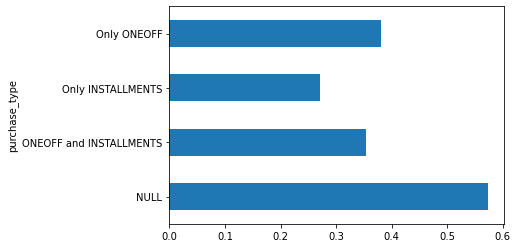

In [51]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect

In [59]:
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])


,NULL,ONEOFF and INSTALLMENTS,Only INSTALLMENTS,Only ONEOFF
0,0,0,1,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,0,1,0
8946,0,0,1,0
8947,0,0,1,0
8948,1,0,0,0


Merge the created dummy with the original data frame

In [60]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)
l=['purchase_type']
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_AVG_purchase                False
Monthly_cash_advance                False
payment_minpay                      False
limit_usage                         False
NULL                                False
ONEOFF and INSTALLMENTS             False
Only INSTALLMENTS                   False
Only ONEOFF                         False
dtype: bool

<AxesSubplot:>

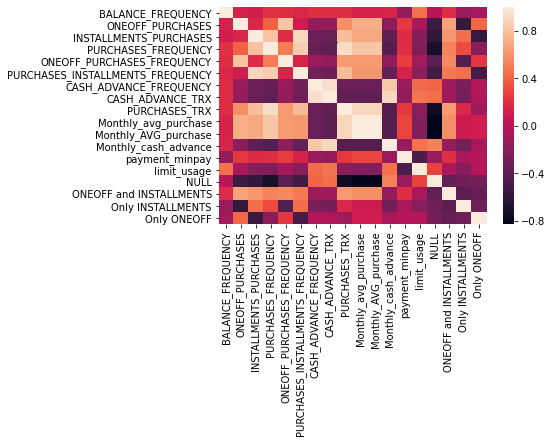

In [61]:
sns.heatmap(cr_dummy.corr())

### Standardrizing data to put data on the same scale

In [62]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
cr_scaled=sc.fit_transform(cr_dummy)

In [63]:
cr_scaled

array([[-0.14875746, -0.98708958,  0.39447984, ..., -0.67019253,
         1.72051649, -0.514625  ],
       [ 0.17961568, -0.98708958, -1.08745376, ..., -0.67019253,
        -0.58122082, -0.514625  ],
       [ 0.49271003,  1.06202168, -1.08745376, ..., -0.67019253,
        -0.58122082,  1.94316249],
       ...,
       [-0.09290575, -0.98708958,  0.52779444, ..., -0.67019253,
         1.72051649, -0.514625  ],
       [-0.09290575, -0.98708958, -1.08745376, ..., -0.67019253,
        -0.58122082, -0.514625  ],
       [-0.73437135,  1.16861854, -1.08745376, ..., -0.67019253,
        -0.58122082,  1.94316249]])

### Explaining componets variance

In [66]:
from sklearn.decomposition import PCA

#We have 17 features so our n_component will be 17.
cr_dummy.shape
pc=PCA(n_components=17)
cr_pca=pc.fit(cr_scaled)

In [67]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [68]:
var_ratio

{2: 0.6000853470314143,
 3: 0.7392613086744784,
 4: 0.816826812351074,
 5: 0.8807344239563172,
 6: 0.920025934206578,
 7: 0.9417262399160146,
 8: 0.9611062650098873,
 9: 0.9728589902487423,
 10: 0.982365285390013,
 11: 0.9901299690140261,
 12: 0.9930752029485337,
 13: 0.9955801684308823,
 14: 0.998028469236758,
 15: 0.999619188003833,
 16: 1.0,
 17: 1.0}

Since 5 components are explaining about 87% variance so we select 5 components

In [70]:
pc_final=PCA(n_components=6).fit(cr_scaled)
reduced_cr=pc_final.fit_transform(cr_scaled)

dd=pd.DataFrame(reduced_cr)
dd.head()

,0,1,2,3,4,5
0,-0.456062,-2.756620,0.379383,-0.444900,0.008705,0.021145
1,-4.262327,0.244241,-0.535652,1.028881,-0.323219,-0.566935
2,1.465947,1.503989,2.686314,-1.830205,-0.231250,-0.612388
3,-0.635043,0.906002,2.524957,-1.435780,0.841235,1.417289
4,-1.730629,-0.164991,2.283085,-1.535454,-0.772215,-0.682158


### Clustering

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

In [71]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

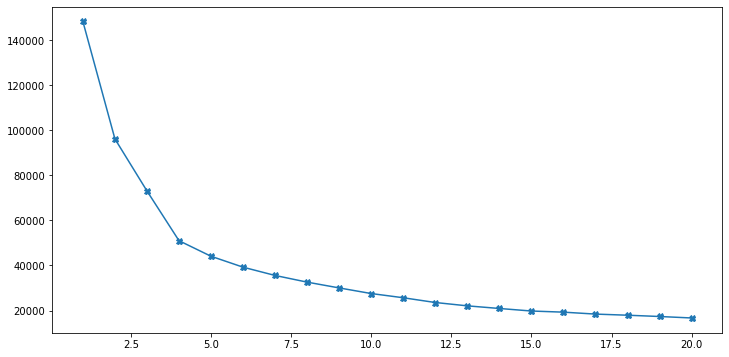

In [75]:
# allow plots to appear in the notebook
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.
    

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:21]

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "X" )

From above graph we will find elbow range. here it is 4,5,6

### Silhouette Coefficient

In [79]:
from sklearn import metrics

In [80]:
# calculate SC for K=3 through K=12
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

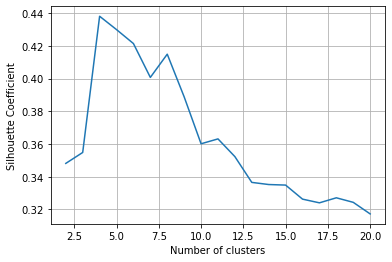

In [81]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

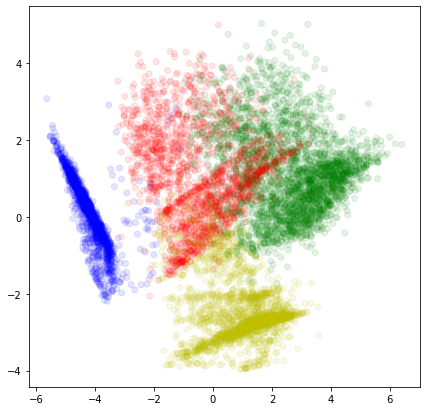

In [82]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

### Interprate result

In [86]:
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','ONEOFF and INSTALLMENTS','Only INSTALLMENTS','Only ONEOFF','NULL','CREDIT_LIMIT']

In [87]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_AVG_purchase,Monthly_cash_advance,payment_minpay,limit_usage
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,3.050877,2.163970,1.357600,0.296081
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.002823,2.429741,0.940149,0.250303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,1.481458,0.000000,0.648817,0.040656
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,3.494587,0.000000,1.109459,0.264455
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.587295,4.606022,1.953415,0.540911
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.315721,8.276166,8.830767,2.827902


In [90]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,ONEOFF and INSTALLMENTS,Only INSTALLMENTS,Only ONEOFF,NULL,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,3
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [91]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.120192,0.039770,33.078538,12.048923
Monthly_avg_purchase,69.784734,0.107581,193.407547,47.585818
Monthly_cash_advance,78.084693,185.786466,67.613418,33.943528
limit_usage,0.379170,0.575731,0.354187,0.265051
CASH_ADVANCE_TRX,2.893162,6.510302,2.810351,1.036355
payment_minpay,5.566253,9.942519,7.256072,13.402571
ONEOFF and INSTALLMENTS,0.002671,0.001917,1.000000,0.000898
Only INSTALLMENTS,0.000000,0.016291,0.000000,0.999102
Only ONEOFF,0.997329,0.003354,0.000000,0.000000
NULL,0.000000,0.978438,0.000000,0.000000


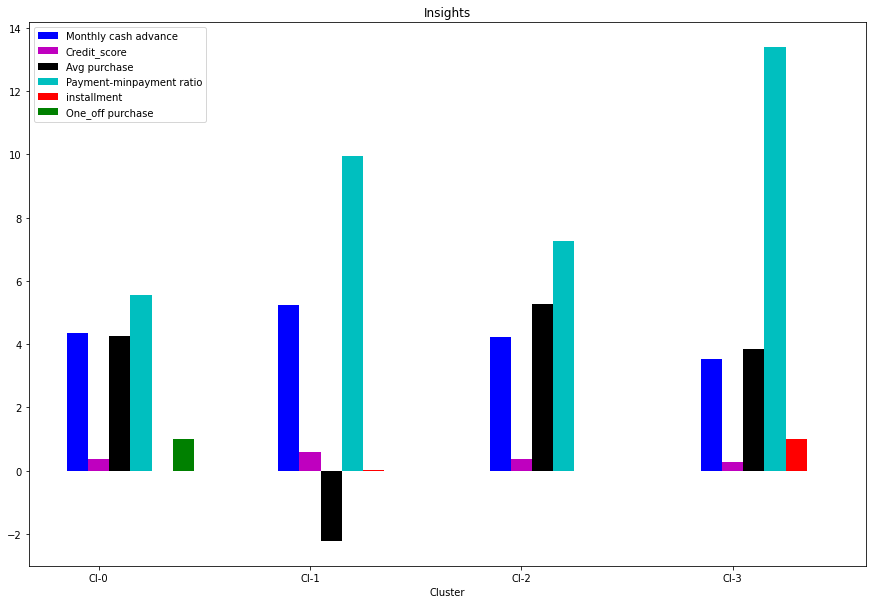

In [93]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['Only INSTALLMENTS',:].values
one_off=cluster_4.loc['Only ONEOFF',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

**Result analyse**

<big>


- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base

In [94]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4   
0          0    1872
1          1    2087
2          2    2763
3          3    2228
Name: Cluster_4, dtype: int64
Cluster -4 
   Size  Percentage
0  1872   20.916201
1  2087   23.318436
2  2763   30.871508
3  2228   24.893855


### Finding behaviour with 5 Clusters

In [95]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)

Text(0, 0.5, 'PC_1')

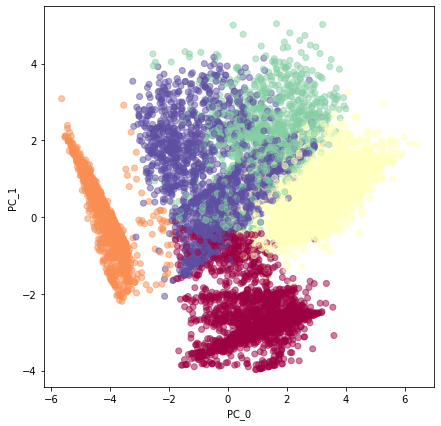

In [96]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [98]:
# Finding Mean of features for each cluster

cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,11.918881,0.032614,34.706599,27.516892,7.095596
Monthly_avg_purchase,47.364663,0.070211,211.315519,140.739289,68.880850
Monthly_cash_advance,20.561824,184.567083,4.019410,249.852297,73.919654
limit_usage,0.248925,0.576341,0.258395,0.601237,0.376991
CASH_ADVANCE_TRX,0.550583,6.421103,0.151777,10.349099,2.695489
payment_minpay,13.806995,9.947252,8.698685,3.637777,5.562159
ONEOFF and INSTALLMENTS,0.000000,0.000000,1.000000,0.897523,0.003759
Only INSTALLMENTS,1.000000,0.016787,0.000000,0.090090,0.000000
Only ONEOFF,0.000000,0.003837,0.000000,0.012387,0.996241
NULL,0.000000,0.979376,0.000000,0.000000,0.000000


### Conclusion With 5 clusters : 

- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side

--> So we don't have quite distinguishable characteristics with 5 clusters
---




In [100]:
# percentage of each cluster

s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print (s1)

print ("Cluster-5"),'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print (pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster_5   
0          0    2145
1          1    2085
2          2    1970
3          3     888
4          4    1862
Name: Cluster_5, dtype: int64
Cluster-5
   Size  Percentage
0  2145   23.966480
1  2085   23.296089
2  1970   22.011173
3   888    9.921788
4  1862   20.804469


### Finding behavior with 6 clusters

In [101]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)

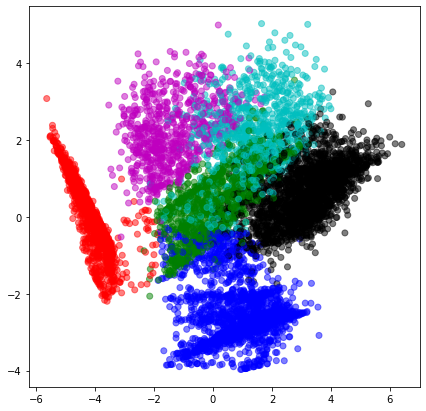

In [102]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [103]:
cluster_df_6 = pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,0.028888,11.924476,7.759494,27.758542,5.952857,34.748601
Monthly_avg_purchase,0.067266,47.406194,78.655517,139.739984,53.741881,211.666151
Monthly_cash_advance,184.292967,20.539025,3.704004,242.232942,206.498857,4.021011
limit_usage,0.575913,0.248989,0.245597,0.600797,0.607376,0.257792
CASH_ADVANCE_TRX,6.403467,0.548718,0.130802,9.964692,7.717143,0.149618
payment_minpay,9.972653,13.807069,6.904530,3.611532,3.243130,8.716118
ONEOFF and INSTALLMENTS,0.000000,0.000000,0.007595,0.911162,0.000000,1.000000
Only INSTALLMENTS,0.016851,1.000000,0.000000,0.088838,0.002857,0.000000
Only ONEOFF,0.000000,0.000000,0.992405,0.000000,0.997143,0.000000
NULL,0.983149,0.000000,0.000000,0.000000,0.000000,0.000000


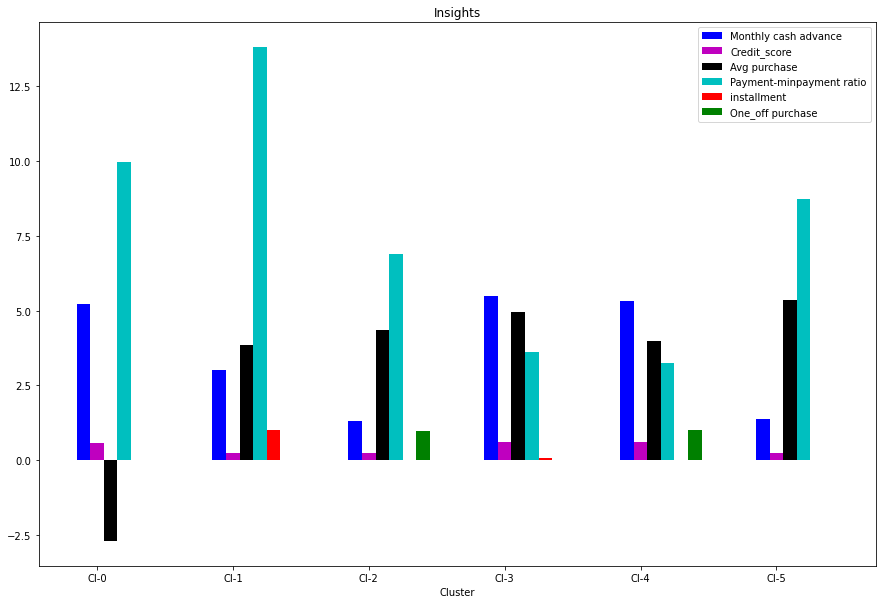

In [108]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['Only INSTALLMENTS',:].values
one_off=six_cluster.loc['Only ONEOFF',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

### Conclusion with  6 clusters:

- Here also groups are overlapping.
     - Cl-0 and Cl-2 behaving same 

### Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

<AxesSubplot:>

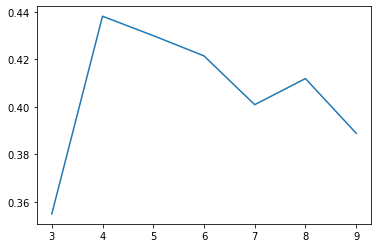

In [109]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)
    
pd.Series(score).plot()

<AxesSubplot:>

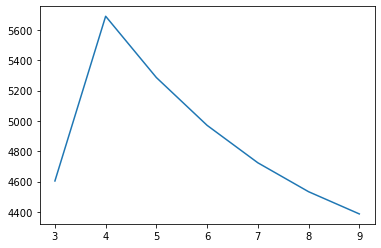

In [110]:
pd.Series(score_c).plot()

### -- Results --

- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side ***This group is about 21% of the total customer base***

- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. ***This group is about 23% of the total customer base***

- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. ***This group is about 31% of the total customer base ***
 
- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases.*** This group is about 25% of the total customer base***


### Suggested Marketing Strategy

#### Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
#### Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction

#### Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
#### Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.